<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/%EB%B9%85%EC%BD%98_eda_ing(08-23)copy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 빅콘테스트 데이터분석분야 수산 Biz 부문 

1. 가격 예측시, 수입용도, 수입형태 등 제공데이터와 동일하게 세분화하여 제출하여야 하나요? 

 - 상세 어종별 평균단가를 예측하시면 됩니다.



2. 각 용어의 의미는?

 - 수출국 : 원료를 수입하여 가공 후 반제품 또는 최종제품형태로 제조하여 수출하는 국가 

 - 제조국 : 원료를 생산 또는 생산·가공하는 국가

  (예시)

  ① 명태포(필렛)의 경우, 원료의 제조국(원산지)은 러시아지만, 필렛으로 가공하여 한국으로 수출 시 수출국은 중국입니다. 

      이 경우, 제조국(원산지) – 러시아, 수출국 – 중국입니다. 

  ② 러시아산 명태를 중국에서 단순 명태포(필렛)으로 가공하고, 반제품 형태로 일본으로 수출, 일본에서 최종제품 형태로 제조 후 수 한국으로 수출한 경우, 수출국은 일본으로 표시됩니다.

      이 경우, 제조국(원산지) – 러시아, 수출국 – 일본입니다.

      단순히 원료형태로 수입하는 경우, “제조국(원산지) = 수출국”입니다. 

  ③ 러시아에서 명태를 원료를 수입한 경우, 제조국(원산지), 수출국 모두 러시아입니다.

 - 수입용도_반송품 : 국내 통관이 되지 않고 제3국으로 수출될 경우(중계무역)로 대부분 수입가격은 기재되지 않지만 제3국 거래당사자가 가격표시를 요청할 경우 가격을 표시함

 - 수입용도_자사제품제조용 : 제조공장이 직접 수입한 경우로, 수입한 수산물을 통관 후 유통·판매하는 것이 아니라 자사의 제품원료로 사용할 목적으로 수입하였을 때 자사제품제조용으로 분류

    (예시) 골뱅이의 경우, 제조사 통조림 제품의 원료로 사용할 목적(자사제품제조용)으로 수입하였으며, 원료의 형태로 재판매하지 않음

 - 수입용도_외화획득용 원료 : 외화획득을 목적으로 생산에 필요한 원료로 수출을 목적으로 제품을 생산하기 위해 수입한 원료를 뜻함

    (예시) 스페인산 다랑어를 수입하여, 한국에서 스테이크용으로 절단 가공한 후 다시 EU로 수출하는 경우, 스페인산 다랑어는 외화획득용 원료임



3. 평균단가의 단위 및 기준은?

 - 미국달러($)/kg 입니다.

 - 데이터는 대한민국이 기준으로, 제조국 또는 수출국의 판매자가 대한민국의 수입자에게 파는 가격을 기준으로 합니다. 

 

4. 결과 제출용 모형 구축시 예측값과 무관한 상세어종, 카테고리 등 변수를 고려하여야 하나요?

 - 평가는 데이터와 도메인의 이해, 분석 전 과정에 대하여 평가에 포함되오니 변수 선택, 세부 모형 구축 방법 등은 참가자의 판단하에 결과물에포함하여 제출하여 주시면 됩니다.

# 1. 필요 패키지 정의

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


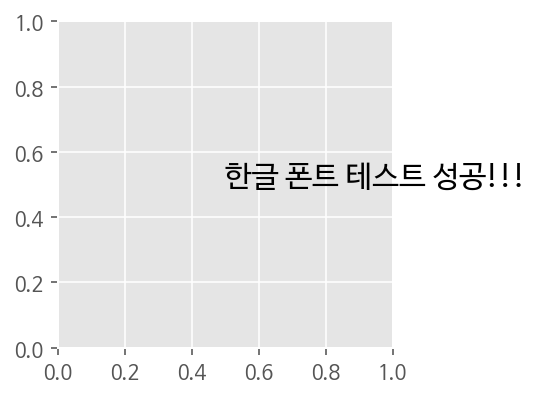

In [287]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
train_data= pd.read_excel("/content/drvie/MyDrive/bigcon1.xlsx")

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


# 2.Data Check

In [289]:
train_data.shape

(42073, 10)

In [290]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   P_TYPE         42073 non-null  object        
 2   CTRY_1         42073 non-null  object        
 3   CTRY_2         42073 non-null  object        
 4   P_PURPOSE      42073 non-null  object        
 5   CATEGORY_1     42073 non-null  object        
 6   CATEGORY_2     42073 non-null  object        
 7   P_NAME         42073 non-null  object        
 8   P_IMPORT_TYPE  42073 non-null  object        
 9   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.2+ MB


In [291]:
train_data.head(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [292]:
train_data.tail(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967
42072,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,13.205675


In [293]:
train_data.describe()

,P_PRICE
count,42073.000000
mean,9.545346
std,21.914624
min,0.203770
25%,2.654165
50%,5.165478
75%,9.929108
max,1522.038402


In [294]:
train_data['P_TYPE'].value_counts()

수산물    42073
Name: P_TYPE, dtype: int64

In [295]:
train_data=train_data.drop('P_TYPE',axis=1)
y=train_data['P_PRICE']

In [296]:
objects=train_data.select_dtypes(include=['object'])
objects.columns

Index(['CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2', 'P_NAME',
       'P_IMPORT_TYPE'],
      dtype='object')

In [297]:
train_data.isnull().sum()

REG_DATE         0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

In [298]:
train_data[train_data['CTRY_1'] != train_data['CTRY_2'] ]

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
17,2015-12-28,프랑스,스페인,판매용,어류,참치 새치류,대서양참다랑어,냉장,28.868041
23,2015-12-28,대한민국,북한,판매용,젓갈류 해조류 해파리,미역,미역,염장,0.913119
39,2015-12-28,대만,벨리즈,판매용,어류,꽁치 학꽁치,꽁치,냉동,0.956387
40,2015-12-28,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,필렛(F),횟감",12.799577
41,2015-12-28,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,목살,횟감",3.628571
...,...,...,...,...,...,...,...,...,...
42006,2019-12-30,에콰도르,베네수엘라,외화획득용 원료,어류,갈치,갈치,냉동,1.774222
42009,2019-12-30,러시아,중국,판매용,어류,명태,명태,냉동,5.051081
42030,2019-12-30,러시아,중국,판매용,어류,가자미,각시가자미,냉동,2.263721
42040,2019-12-30,러시아,중국,판매용,어류,명태,명태,"냉동,필렛(F)",3.226426


# 3.EDA(~ing)

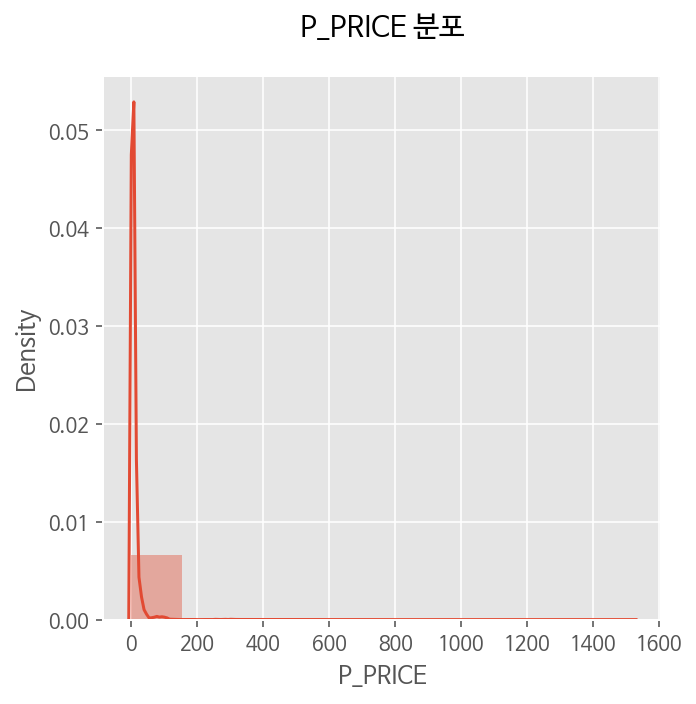

In [299]:
plt.figure(figsize=(5,5))
plt.title("P_PRICE 분포", pad= 20)
sns.distplot(train_data['P_PRICE'],bins=10)

In [300]:
CTRY1_MEAN = train_data.groupby('CTRY_1')['P_PRICE'].agg(**{'CTRY_1 mean price':'mean'}).reset_index()
CTRY1_MEAN=CTRY1_MEAN.sort_values(by=['CTRY_1 mean price'], axis=0,ascending=False)

In [301]:
CATEGORY_1_MEAN=train_data.groupby('CATEGORY_1')['P_PRICE'].agg(**{'Category 1 mean price':'mean'}).reset_index()
CATEGORY_1_MEAN=CATEGORY_1_MEAN.sort_values(by=['Category 1 mean price'], axis=0,ascending=False)

In [302]:
CATEGORY_2_MEAN=train_data.groupby('CATEGORY_2')['P_PRICE'].agg(**{'Category 2 mean price':'mean'}).reset_index()
CATEGORY_2_MEAN=CATEGORY_2_MEAN.sort_values(by=['Category 2 mean price'], axis=0,ascending=False)

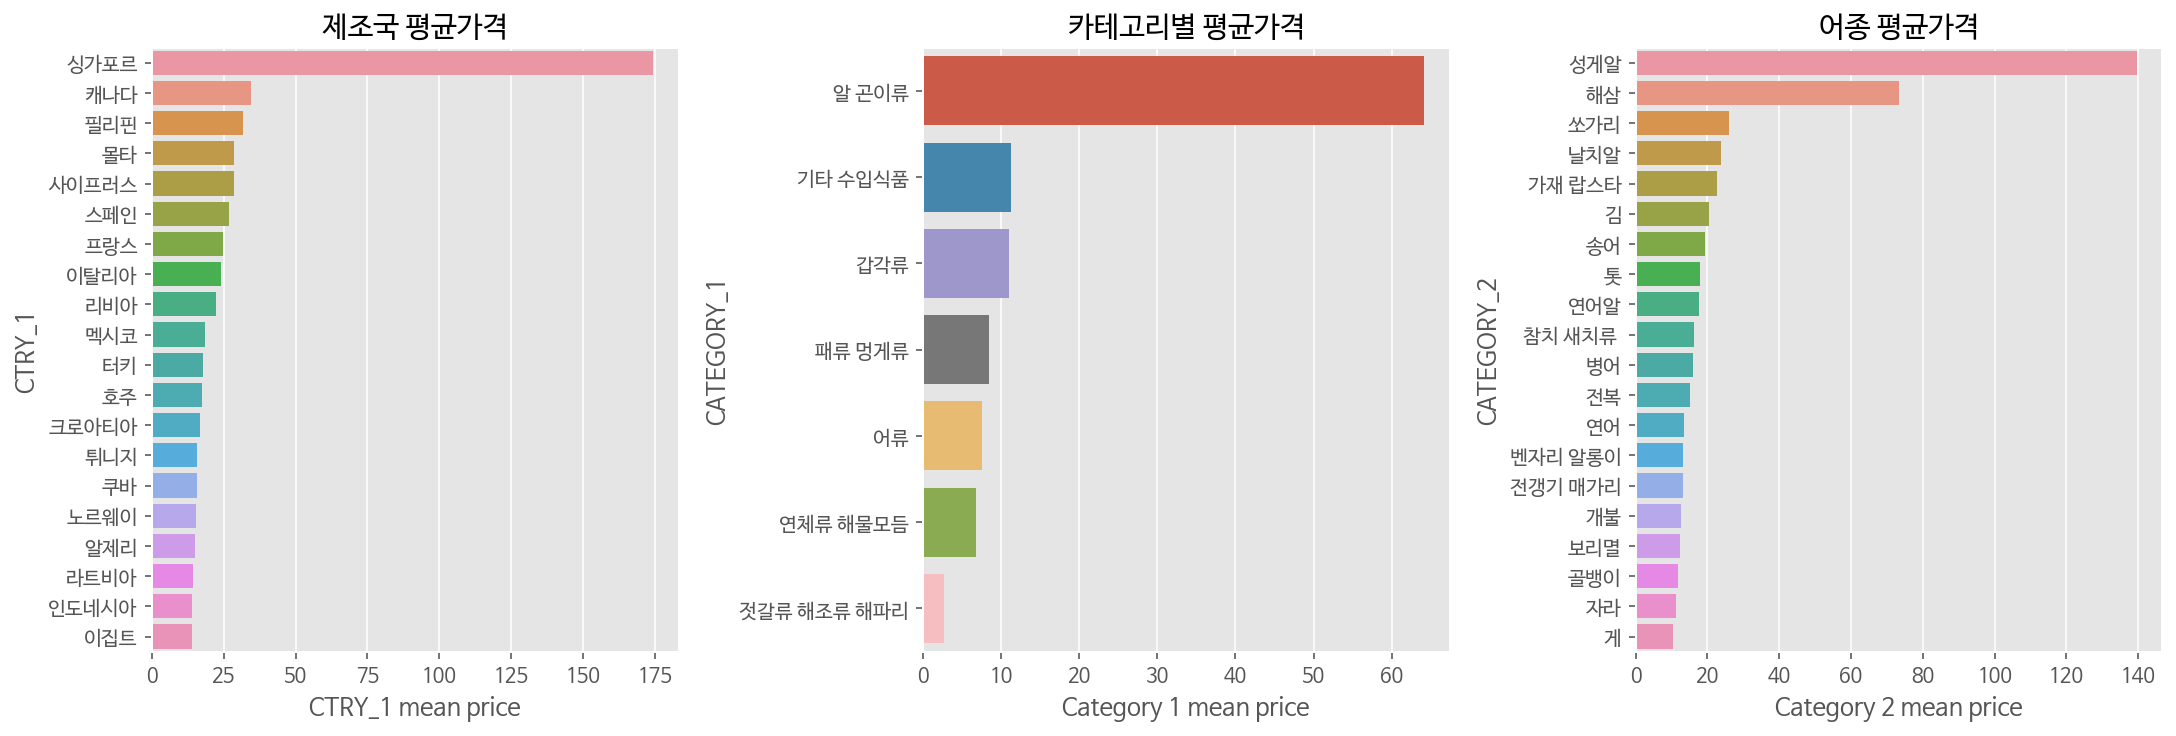

In [303]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = CTRY1_MEAN[0:20], y='CTRY_1', x='CTRY_1 mean price',ax=axes[0])
axes[0].set_title("제조국 평균가격")
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price',ax=axes[1]) 
axes[1].set_title("카테고리별 평균가격")
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price',ax=axes[2])
axes[2].set_title("어종 평균가격")
plt.show()

In [304]:
x=train_data['CATEGORY_1'] 
labels = [str(i) for i in x]
print(labels)

['갑각류', '갑각류', '갑각류', '패류 멍게류', '어류', '어류', '어류', '어류', '갑각류', '갑각류', '패류 멍게류', '패류 멍게류', '패류 멍게류', '패류 멍게류', '연체류 해물모듬', '연체류 해물모듬', '패류 멍게류', '어류', '어류', '연체류 해물모듬', '연체류 해물모듬', '어류', '어류', '젓갈류 해조류 해파리', '어류', '어류', '연체류 해물모듬', '어류', '갑각류', '어류', '알 곤이류', '갑각류', '패류 멍게류', '어류', '어류', '패류 멍게류', '갑각류', '갑각류', '어류', '어류', '어류', '어류', '어류', '어류', '어류', '어류', '연체류 해물모듬', '어류', '갑각류', '어류', '어류', '어류', '어류', '어류', '갑각류', '연체류 해물모듬', '연체류 해물모듬', '연체류 해물모듬', '어류', '어류', '어류', '어류', '어류', '갑각류', '패류 멍게류', '패류 멍게류', '패류 멍게류', '패류 멍게류', '패류 멍게류', '어류', '어류', '어류', '어류', '갑각류', '어류', '갑각류', '패류 멍게류', '어류', '어류', '어류', '갑각류', '어류', '갑각류', '갑각류', '젓갈류 해조류 해파리', '어류', '어류', '어류', '갑각류', '갑각류', '어류', '갑각류', '패류 멍게류', '패류 멍게류', '연체류 해물모듬', '어류', '어류', '알 곤이류', '패류 멍게류', '어류', '어류', '어류', '어류', '갑각류', '갑각류', '어류', '어류', '연체류 해물모듬', '어류', '알 곤이류', '어류', '어류', '패류 멍게류', '갑각류', '젓갈류 해조류 해파리', '어류', '어류', '패류 멍게류', '갑각류', '연체류 해물모듬', '갑각류', '어류', '갑각류', '연체류 해물모듬', '어류', '어류', '젓갈류 해조류 해파리', '패류 멍게류', '어

In [305]:
x=train_data.groupby('CATEGORY_1')
x.count()

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
CATEGORY_1,,,,,,,,
갑각류,7298,7298,7298,7298,7298,7298,7298,7298
기타 수입식품,63,63,63,63,63,63,63,63
알 곤이류,1037,1037,1037,1037,1037,1037,1037,1037
어류,21339,21339,21339,21339,21339,21339,21339,21339
연체류 해물모듬,6772,6772,6772,6772,6772,6772,6772,6772
젓갈류 해조류 해파리,467,467,467,467,467,467,467,467
패류 멍게류,5097,5097,5097,5097,5097,5097,5097,5097


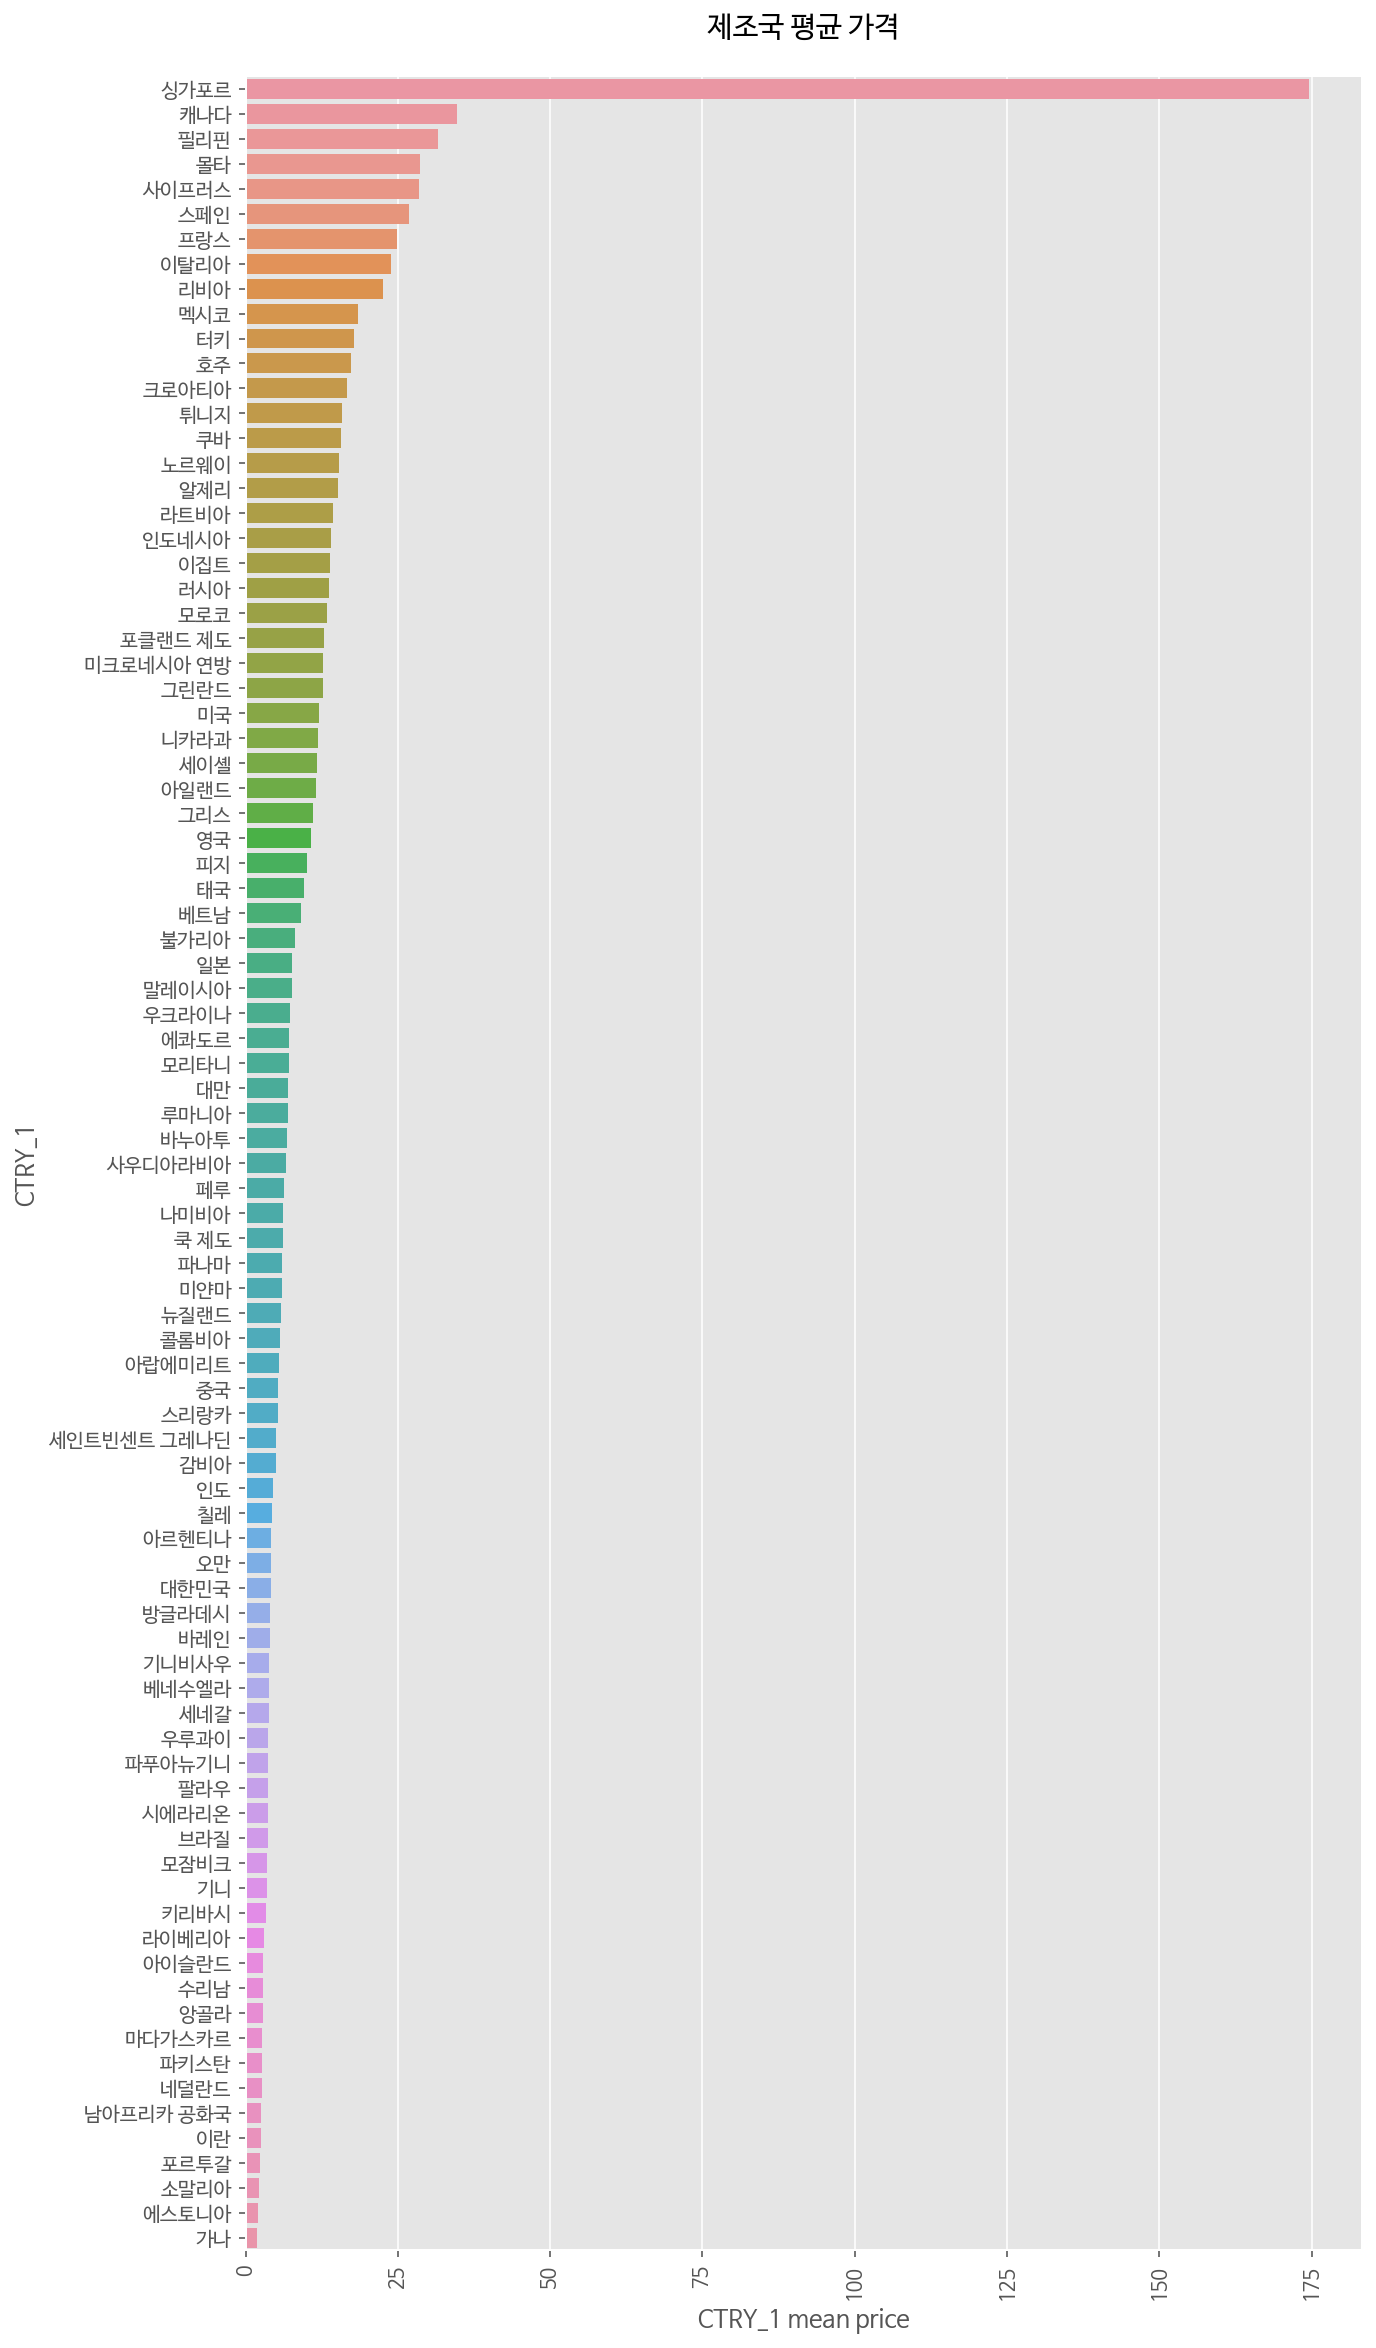

In [306]:
#CTRY_1 확인 결과 싱가포르가 제조국 평균 가격이 극단적으로 높음을 알수있음 값 확인은 위의 Value_counts() 코드 확인
plt.figure(figsize=(10,20))
plt.xticks(rotation = 90)
plt.title('제조국 평균 가격', pad= 20)
sns.barplot(data = CTRY1_MEAN, y='CTRY_1', x='CTRY_1 mean price') 

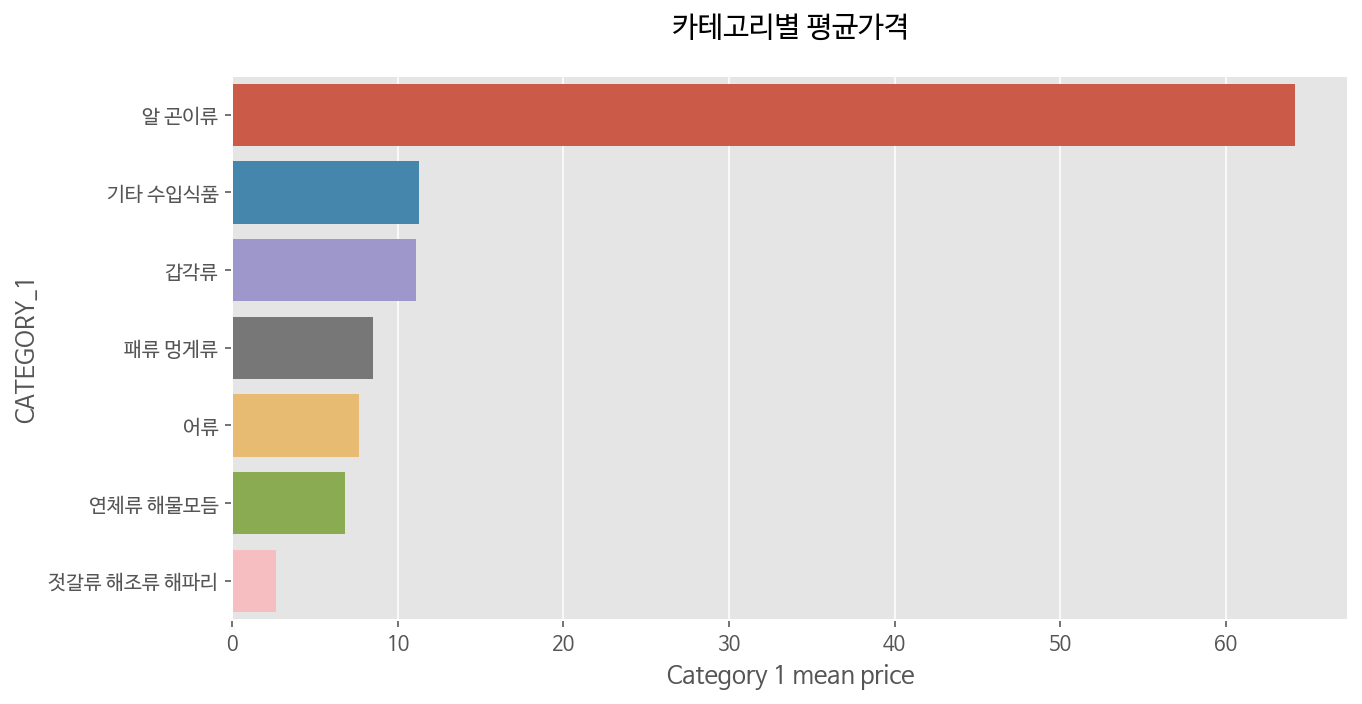

In [307]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('카테고리별 평균가격', pad= 20)
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price') 

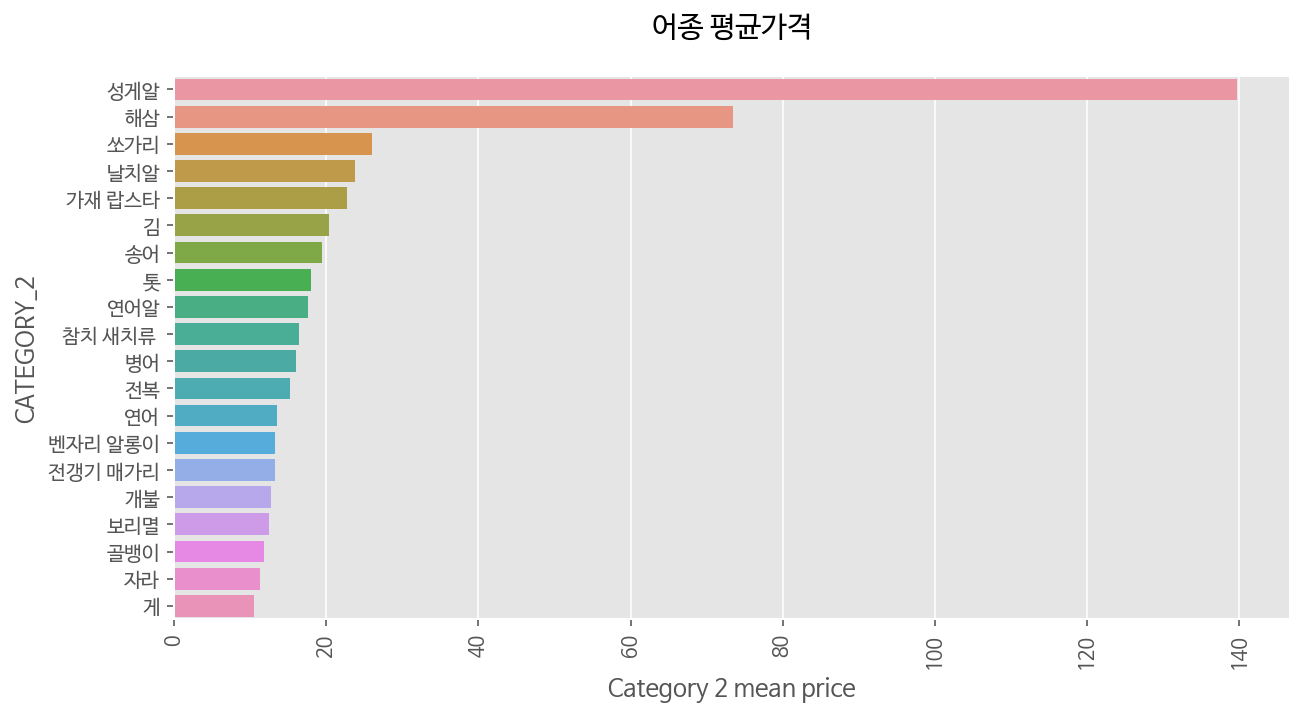

In [308]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('어종 평균가격', pad= 20)
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price')

In [309]:
range(len(objects.columns))

range(0, 7)

In [310]:
sortvalue=train_data['CTRY_1'].value_counts()
sortvalue

중국           11029
러시아           4031
베트남           3946
일본            2855
미국            2777
             ...  
이란               1
수리남              1
미크로네시아 연방        1
팔라우              1
니카라과             1
Name: CTRY_1, Length: 87, dtype: int64

In [311]:
sortvalue2=train_data['CTRY_2'].value_counts()
sortvalue2

중국      12008
일본       4849
베트남      4027
러시아      2924
미국       2400
        ...  
이탈리아        1
쿠바          1
팔라우         1
이란          1
벨리즈         1
Name: CTRY_2, Length: 88, dtype: int64

Text(0.5, 1.0, 'P_PRICE OF REG_DATA CATEGORY_1')

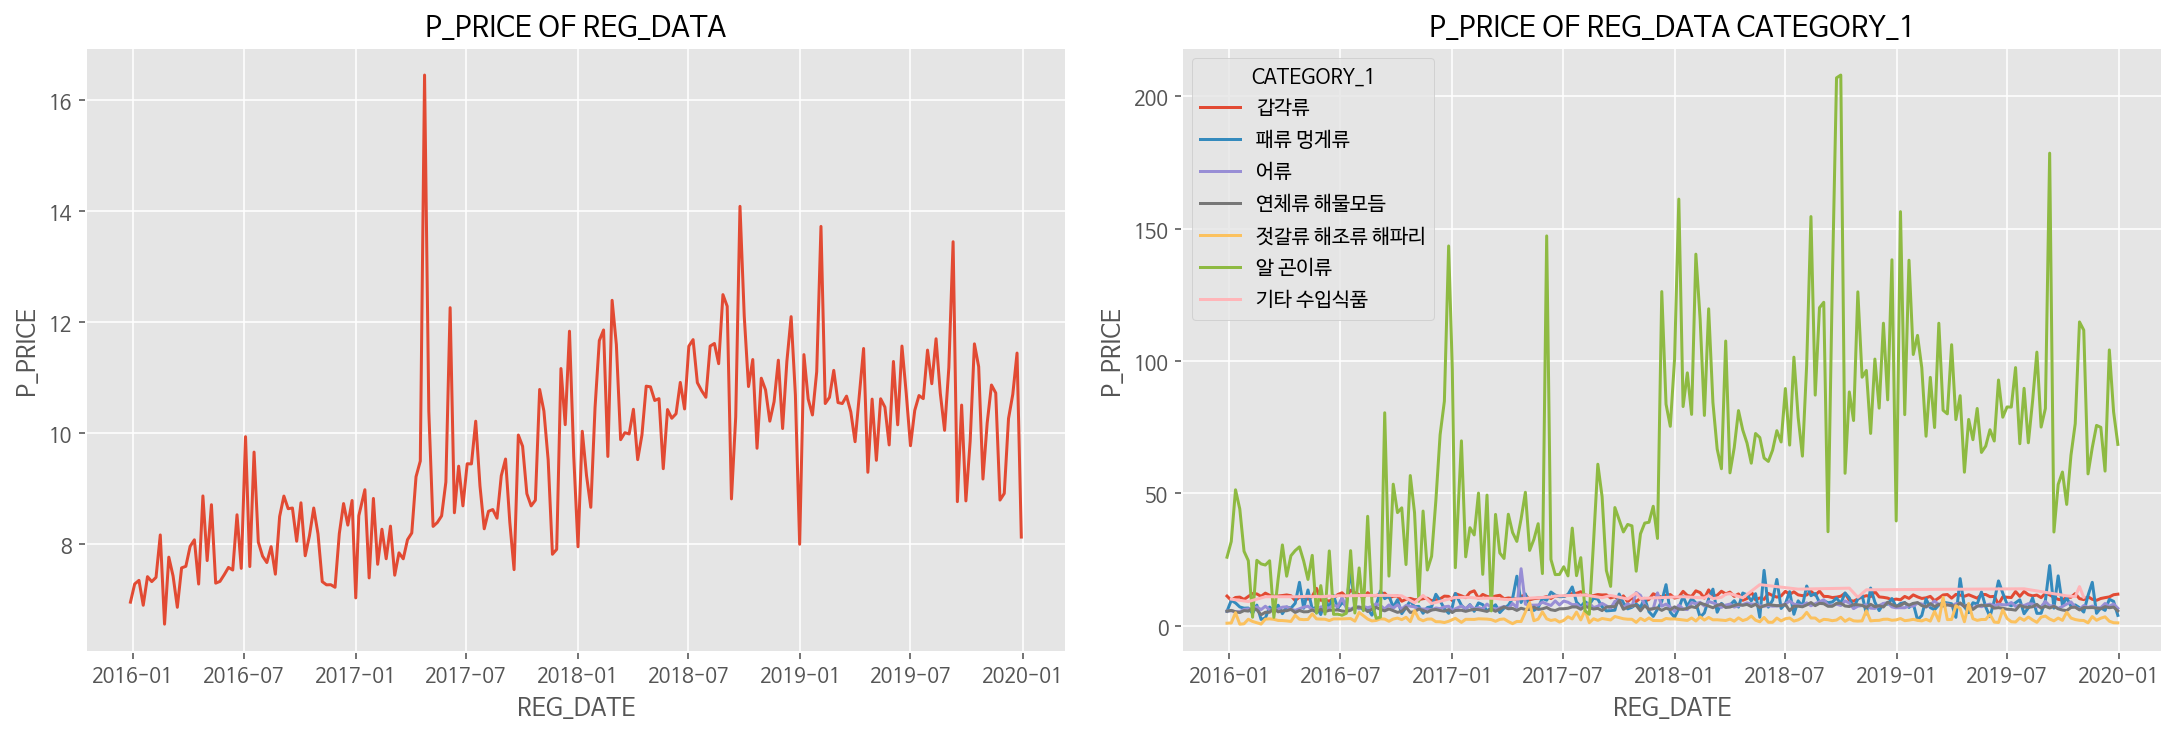

In [312]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',ci=None,ax=axes[0])
axes[0].set_title("P_PRICE OF REG_DATA")
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_1',ci=None,ax=axes[1])
axes[1].set_title("P_PRICE OF REG_DATA CATEGORY_1")

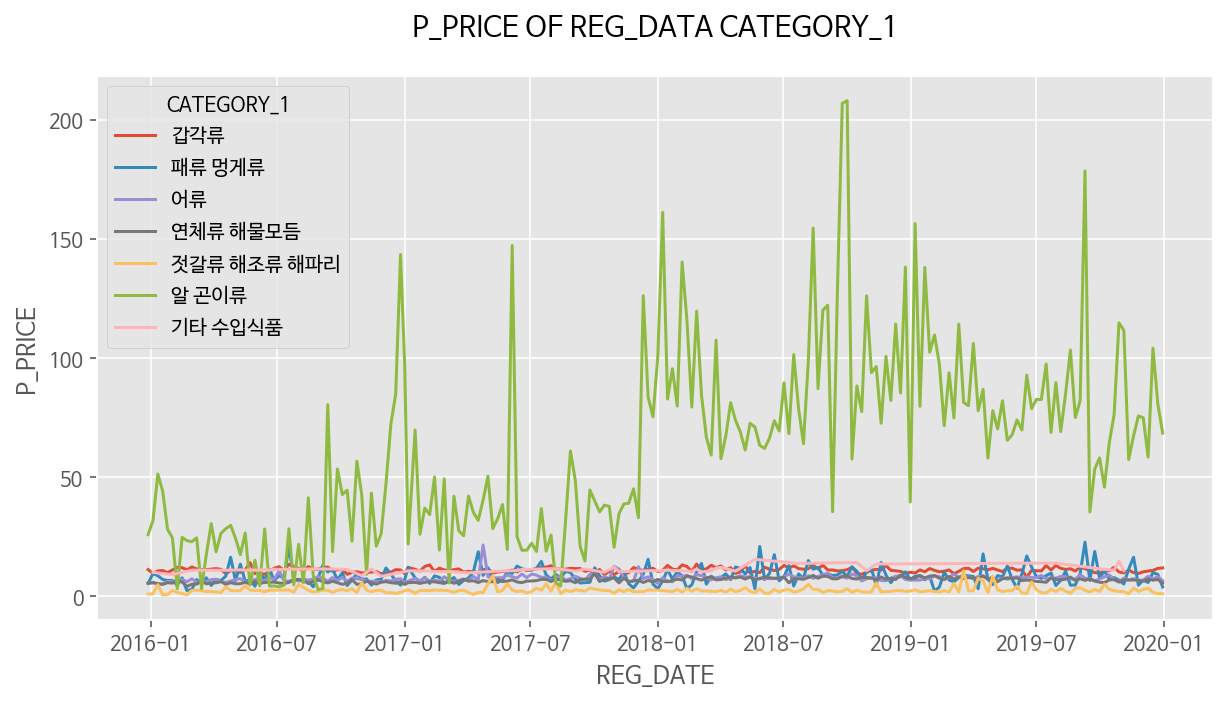

In [313]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('P_PRICE OF REG_DATA CATEGORY_1', pad= 20)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_1',ci=None) 

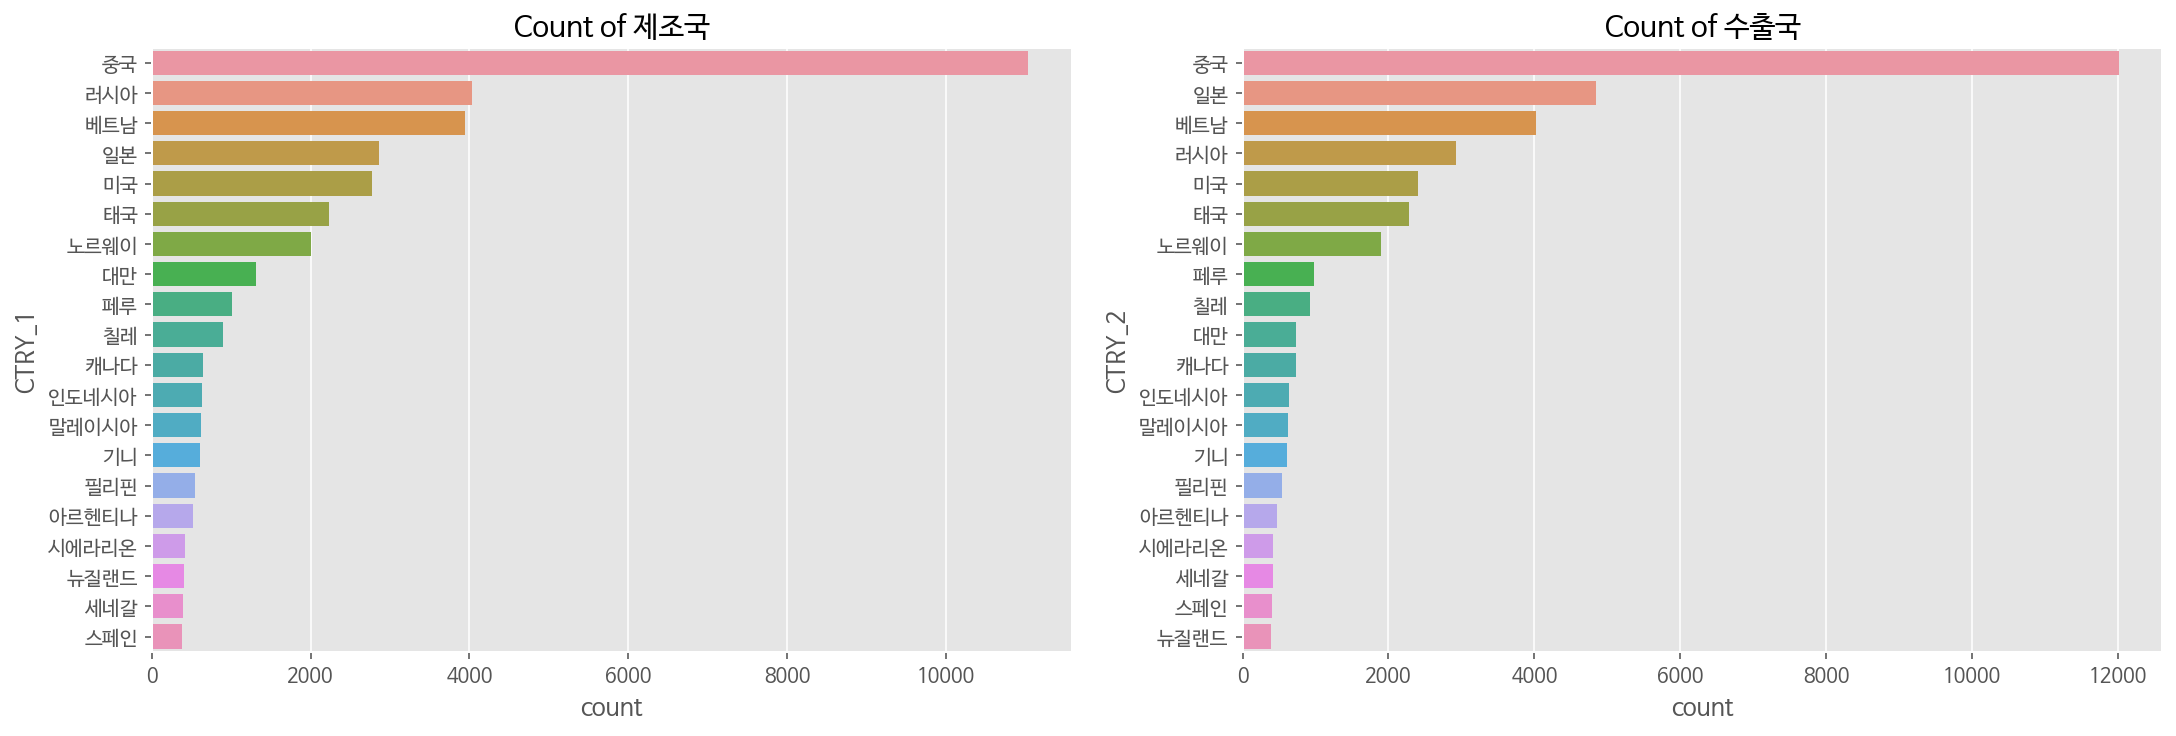

In [314]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(data = train_data, y='CTRY_1',order = sortvalue.index[0:20],ax=axes[0])
axes[0].set_title("Count of 제조국")
sns.countplot(data = train_data, y='CTRY_2',order = sortvalue2.index[0:20],ax=axes[1]) 
axes[1].set_title("Count of 수출국")
plt.show()

In [315]:
CATEGORY_1=train_data['CATEGORY_1'].value_counts()
CATEGORY_1

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

In [316]:
labels=CATEGORY_1.keys()
labels

Index(['어류', '갑각류', '연체류 해물모듬', '패류 멍게류', '알 곤이류', '젓갈류 해조류 해파리', '기타 수입식품'], dtype='object')

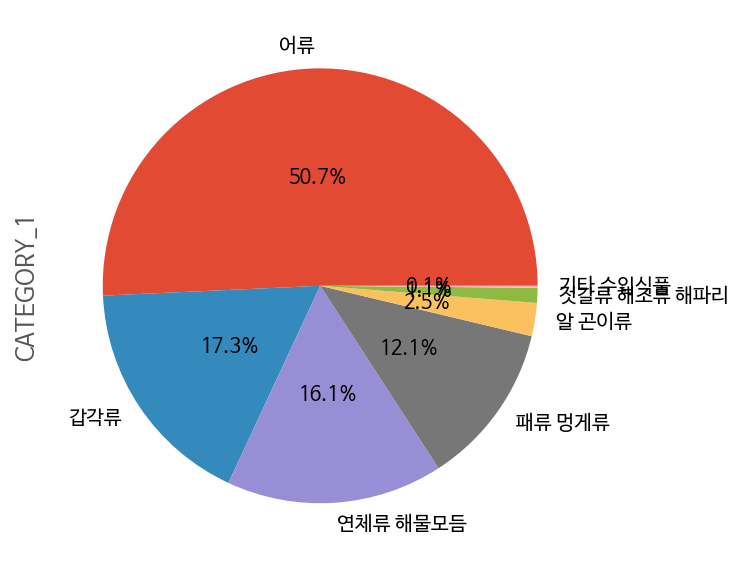

In [318]:
plt.figure(figsize=(10,5))
CATEGORY_1.plot.pie(x=CATEGORY_1,autopct="%.1f%%",labels=labels,pctdistance=0.5)

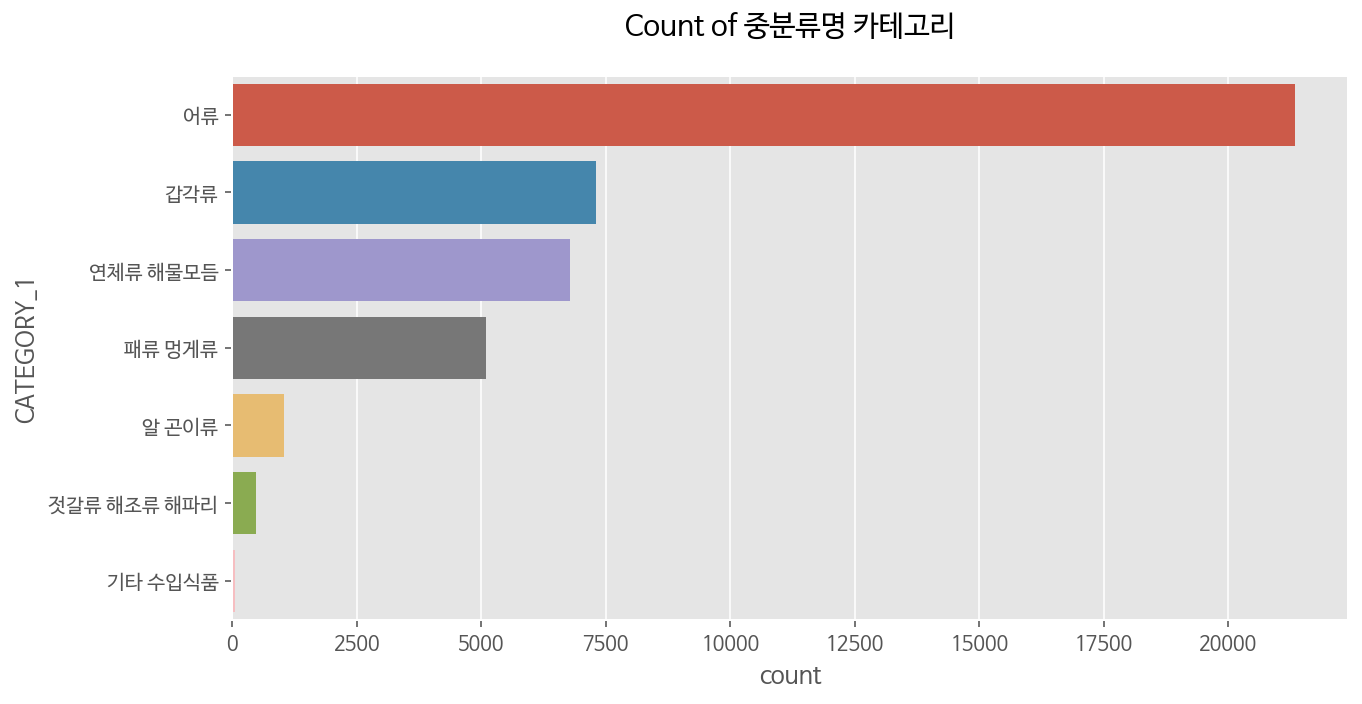

In [319]:
plt.figure(figsize=(10,5))
plt.title('Count of 중분류명 카테고리', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [320]:
CATEGORY_2 = train_data['CATEGORY_2'].value_counts()
CATEGORY_2

새우           4141
참치 새치류       3159
오징어          2662
게            2477
연어           1905
             ... 
버터플라이 킹피쉬       1
은민대구알           1
톳               1
김               1
물메기(곰치)         1
Name: CATEGORY_2, Length: 113, dtype: int64

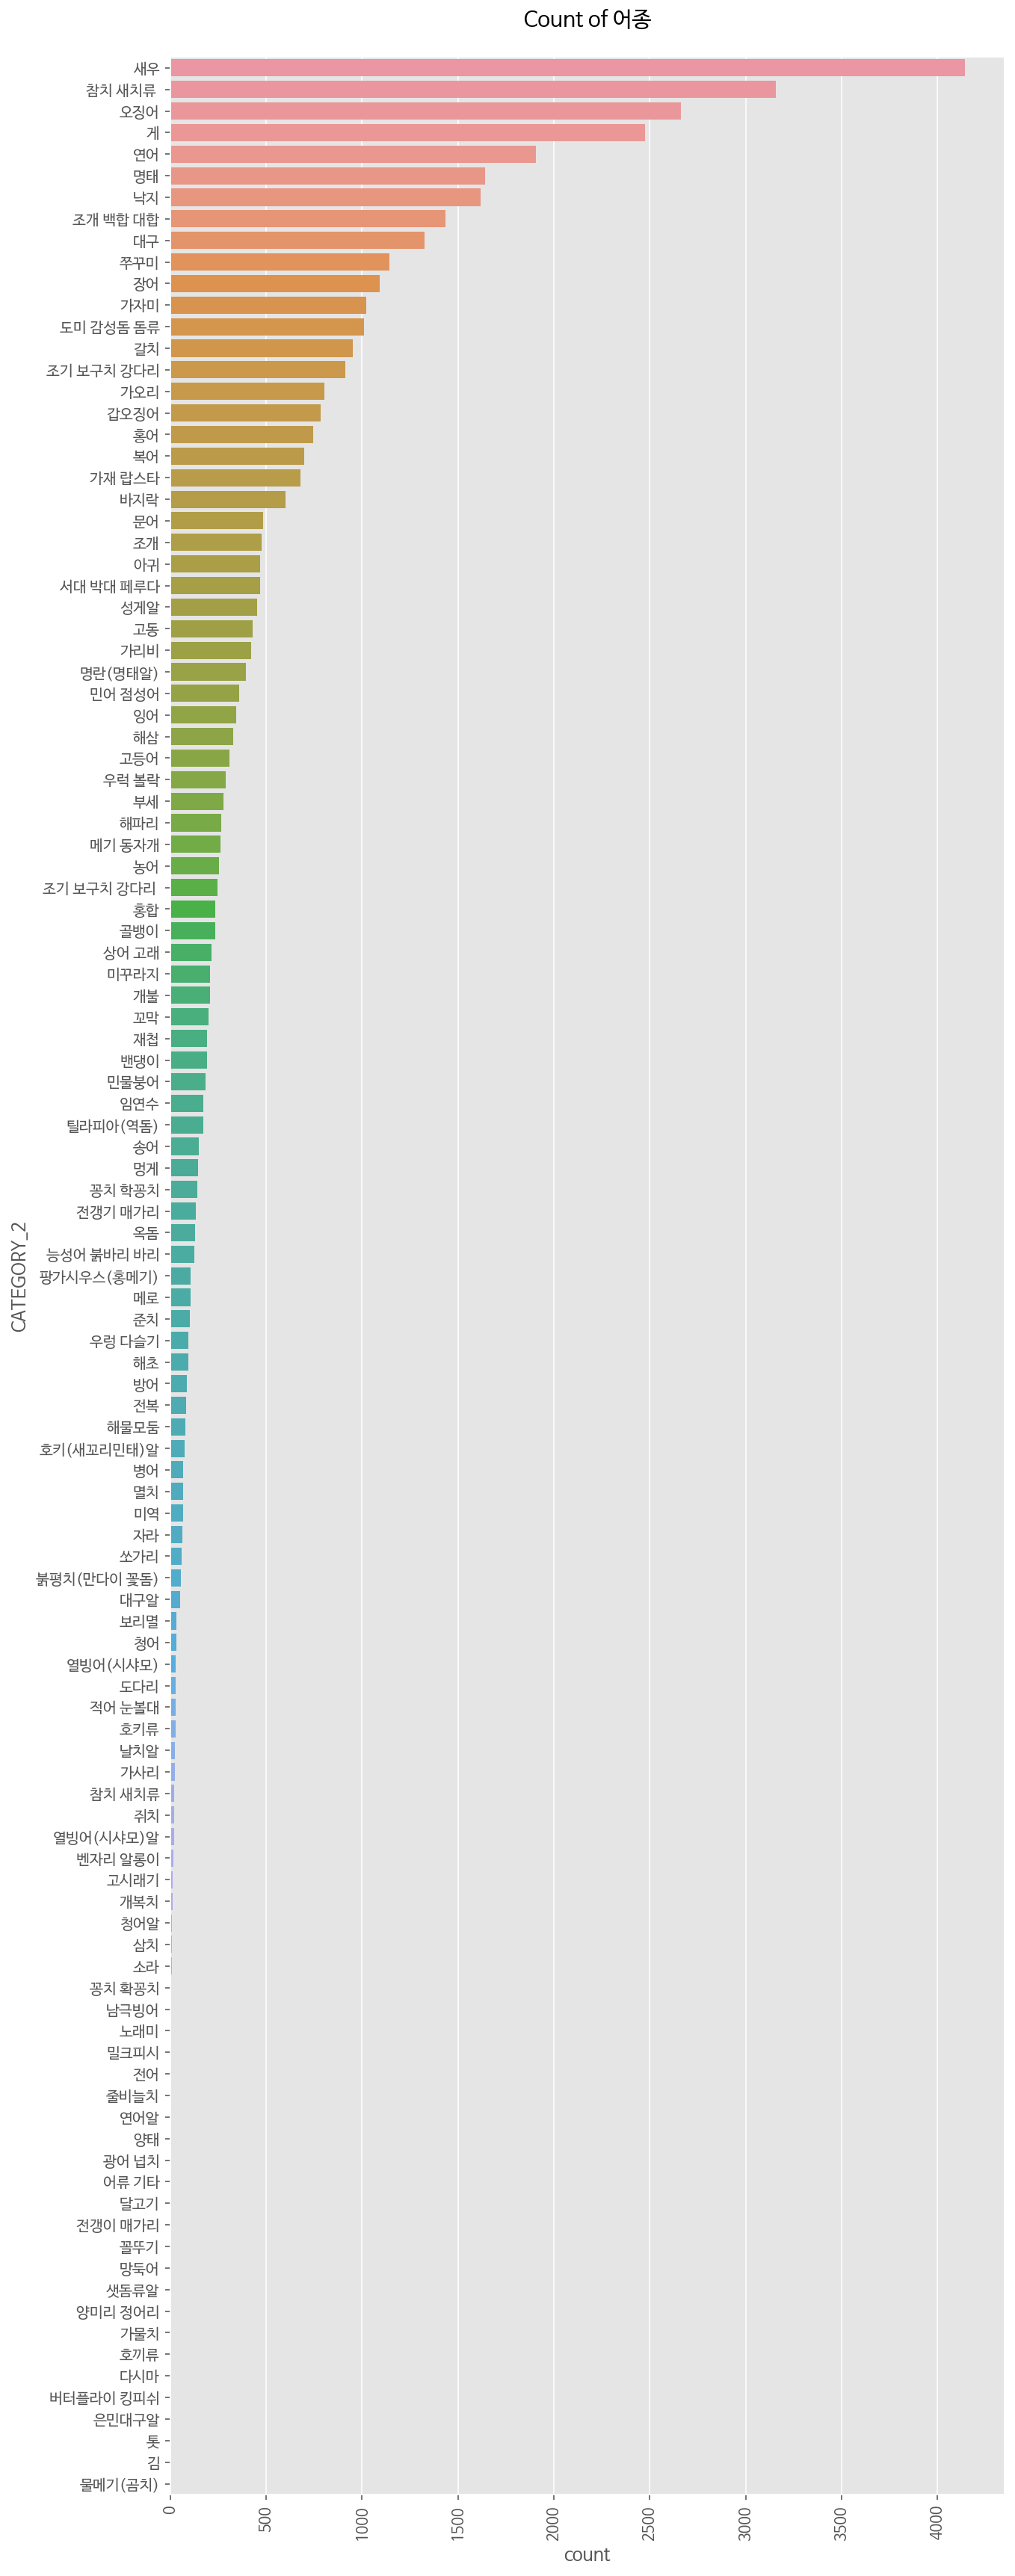

In [321]:
plt.figure(figsize=(10,30))
plt.title('Count of 어종', pad= 20)
plt.xticks(rotation=90)
sns.countplot(data =train_data,y='CATEGORY_2',order = CATEGORY_2.index)
plt.show()

In [322]:
P_IMPOT_TYRE = train_data['P_IMPORT_TYPE'].value_counts()
P_IMPOT_TYRE

냉동                13568
활                  8280
냉장                 4682
냉동,살,자숙            1431
냉동,살               1044
                  ...  
냉동,개아지살,살,포장횟감        2
자숙,건조                 1
건조,지느러미,자숙            1
냉장,간                  1
냉동,자숙,절단,횟감           1
Name: P_IMPORT_TYPE, Length: 78, dtype: int64

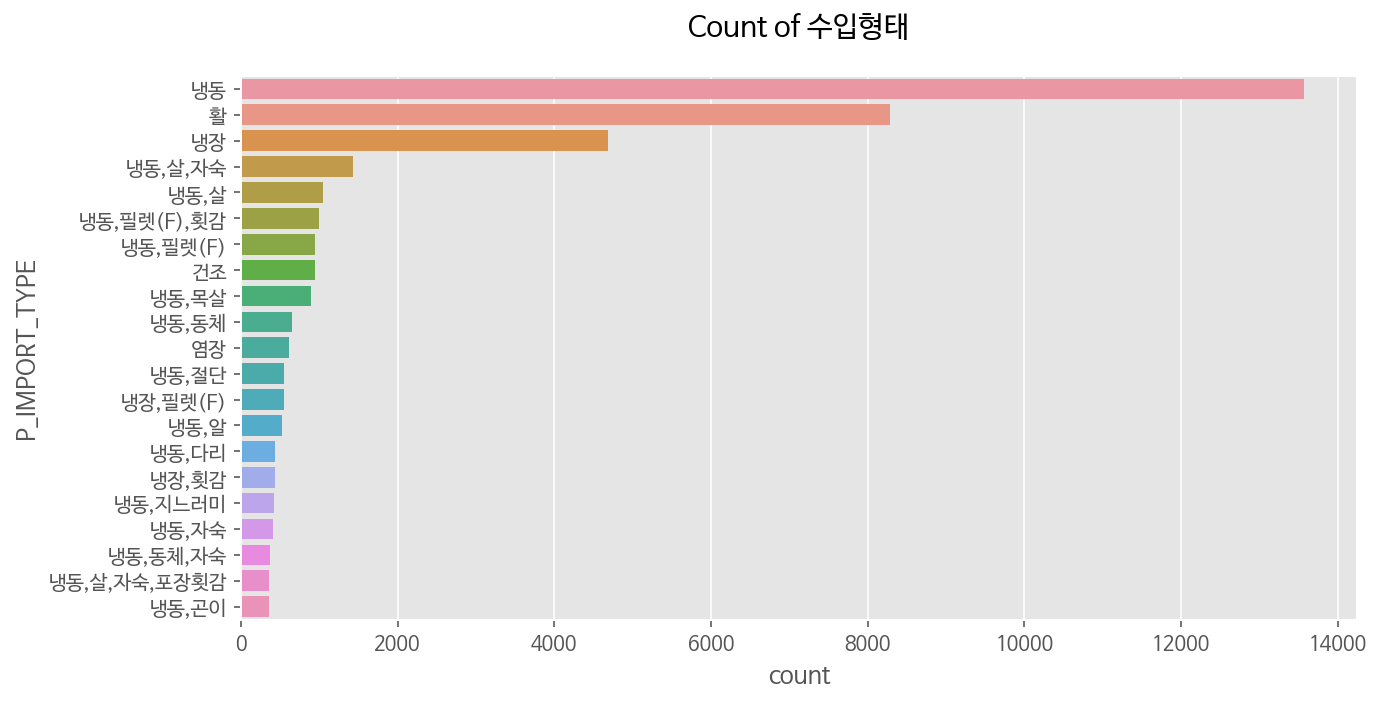

In [323]:
plt.figure(figsize=(10,5))
plt.title('Count of 수입형태', pad= 20)
sns.countplot(data =train_data,y='P_IMPORT_TYPE',order = P_IMPOT_TYRE.index[0:21])
plt.show()

In [ ]:
train_data['P_IMPORT_TYPE'].unique()

In [ ]:
train_data['P_NAME'].unique()

In [326]:
train_data['P_NAME'].value_counts()

흰다리새우        2601
오징어          2150
명태           1640
낙지           1617
연어           1489
             ... 
대두이석태           1
프로펠러조개          1
버터플라이 킹피쉬       1
다시마             1
병치매가리           1
Name: P_NAME, Length: 286, dtype: int64

In [327]:
train_data['P_PURPOSE'].value_counts()

판매용         39278
자사제품제조용      1726
외화획득용 원료      911
합작            144
반송품(기타)        14
Name: P_PURPOSE, dtype: int64

In [328]:
P_NAME=train_data.groupby('P_NAME')['P_PRICE'].agg(**{'P_NAME mean price':'mean'}).reset_index()
PNAME_MEAN=P_NAME.sort_values(by=['P_NAME mean price'], axis=0,ascending=False)
PNAME_MEAN

,P_NAME,P_NAME mean price
238,청새리상어,229.380948
159,성게알,139.730706
33,금눈돔,105.159426
265,해삼,73.410829
150,상어,67.792968
...,...,...
206,장성베도라치,0.799846
103,물메기,0.650000
217,정어리,0.602548
165,스피노잠,0.515048


# 4. 이상값 색출

분명 특정값에서 이상값이 존재할거같은데 어떤 column 에서 존재할지 미지수..다 그려봐야하나..? 우선 냉동은 냉동 냉장은 냉장 활은 활끼리 분류 가능할듯

